In [22]:
import geopandas 
import pandas as pd
pd.set_option('max_colwidth', 200)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns 
sns.set()
import descartes
%matplotlib inline
from random import sample
from math import sin, cos, sqrt, atan2, radians
import numpy as np

lakes = geopandas.read_file("Lakes_and_Rivers")
madison = geopandas.read_file("City_Limit")

In [9]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161
weekday_bus = geopandas.read_file("Metro_Transit_Ridership_by_Route_Weekday")

weekday_bus



,OBJECTID,StopID,Route,Lat,Lon,DailyBoard,DotSize,geometry
0,19341,7215,16,43.084090,-89.325022,9.72,97179.20,POINT (-89.32501598855713 43.08408205170329)
1,19342,7215,31,43.084090,-89.325022,4.01,40110.65,POINT (-89.32501598855713 43.08408205170329)
2,19343,7215,37,43.084090,-89.325022,2.52,25165.14,POINT (-89.32501598855713 43.08408205170329)
3,19344,7215,38,43.084090,-89.325022,10.26,102564.00,POINT (-89.32501598855713 43.08408205170329)
4,19345,7219,35,43.067971,-89.281743,0.33,3338.55,POINT (-89.28173700253664 43.06796305245022)
5,19346,7223,35,43.067560,-89.291297,0.17,1669.27,POINT (-89.29129100010601 43.0675520522667)
6,19347,7223,39,43.067560,-89.291297,3.34,33376.46,POINT (-89.29129100010601 43.0675520522667)
7,19348,7226,31,43.051751,-89.292043,0.17,1671.28,POINT (-89.29203700073032 43.05174305489181)
8,19349,7230,32,43.096102,-89.291095,0.54,5389.78,POINT (-89.2910889969265 43.09609404756924)
9,19350,7232,16,43.062188,-89.320363,58.48,584750.70,POINT (-89.32035699229068 43.06218005515254)


In [10]:
#metro data
metro_data = geopandas.read_file("MetroBusRoutes.gdb")
list_metro = []
for index, row in metro_data.iterrows():
    list_metro.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

metro_series = pd.Series(list_metro)
metro_coord = pd.DataFrame({"Coordinates": metro_series})
metro_coord = geopandas.GeoDataFrame(metro_coord, geometry='Coordinates')

#BRT data
brt_data = geopandas.read_file("BRT.gdb")
list_brt = []
for index, row in brt_data.iterrows():
    list_brt.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

brt_series = pd.Series(list_brt)
brt_coord = pd.DataFrame({"Coordinates": brt_series})
brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')



In [12]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161

list_weekday_bus = []
for index, row in weekday_bus.iterrows():
    list_weekday_bus.append(row["geometry"])
    
weekday_bus_series = pd.Series(list_weekday_bus)
weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')




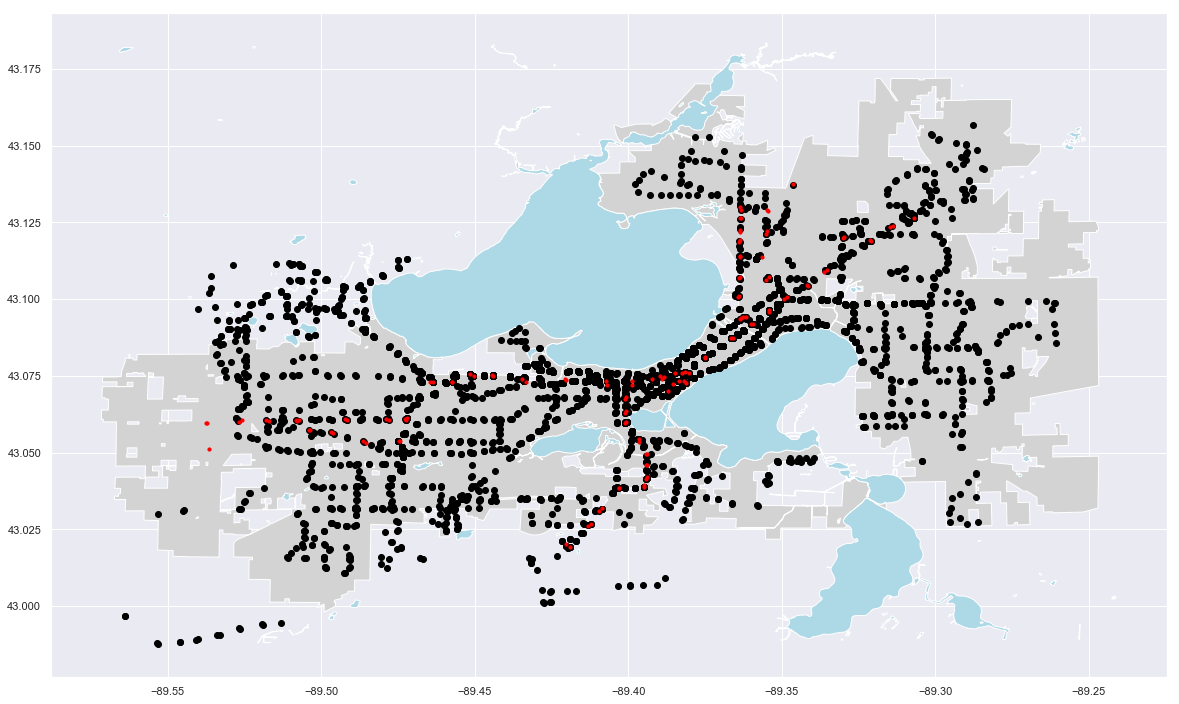

In [15]:
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
weekday_bus_coord.plot(color='black', ax=ax)
brt_coord.plot(color="red", ax=ax, markersize= 10)

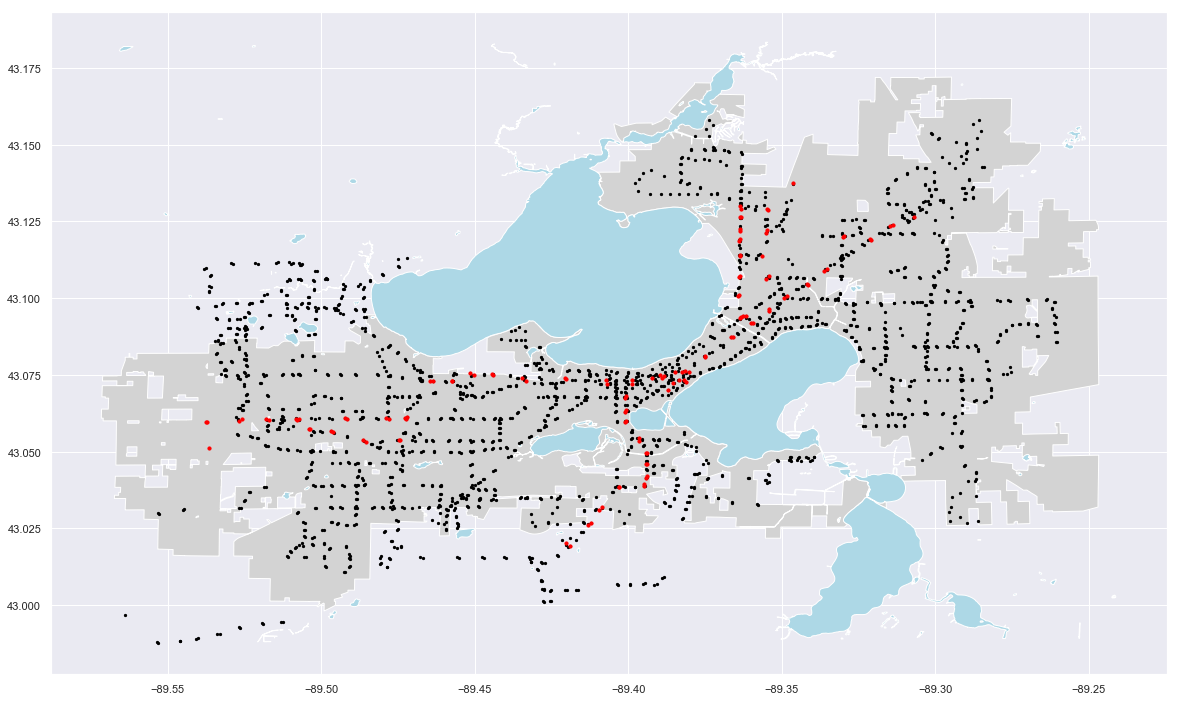

In [19]:
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 10)

In [ ]:
#problem with weekday_ridership_data from madison data open data. does not show the route

In [35]:
from math import sin, cos, sqrt, atan2, radians
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [45]:
list_bus = []
for index, row in weekday_bus.iterrows():
    for index, row1 in brt_data.iterrows(): 
        dist = calculate_distance(float(row['Lat']), float(row1['stop_lat']), float(row['Lon']), float(row1['stop_lon']))
        list_bus.append(dist)
    break
list_bus

[14853.395359060267,
 14853.387205144865,
 14853.379704270801,
 14853.373947019329,
 14853.374710621101,
 14853.372883985441,
 14853.370181293756,
 14853.37082798672,
 14853.373306806137,
 14853.375295915437,
 14853.377418735648,
 14853.381049536367,
 14853.388643855395,
 14853.39681686695,
 14853.368337008742,
 14853.36704805296,
 14853.36602554907,
 14853.3630390418,
 14853.36190163638,
 14853.36702590366,
 14853.357336619432,
 14853.355067847107,
 14853.350941502738,
 14853.355878094477,
 14853.35781842814,
 14853.366939431373,
 14853.362524492004,
 14853.363586007075,
 14853.366382815719,
 14853.367499247863,
 14853.369014954453,
 14853.37426598534,
 14853.387363391343,
 14853.394008966457,
 14853.402130685668,
 14853.405759896665,
 14853.40832978213,
 14853.40959728694,
 14853.406047070066,
 14853.401685781651,
 14853.39358816807,
 14853.387509455095,
 14853.374233208158,
 14853.385017550869,
 14853.380560305784,
 14853.377409751114,
 14853.367071687899,
 14853.36096777108,
 14853

In [48]:
list_bus = []
for index, row1 in brt_data.iterrows():
    for index, row in weekday_bus.iterrows(): 
        dist = calculate_distance(float(row['Lat']), float(row1['stop_lat']), float(row['Lon']), float(row1['stop_lon']))
        list_bus.append(dist)
    break
list_bus

[14853.395359060267,
 14853.395359060267,
 14853.395359060267,
 14853.395359060267,
 14854.823274992938,
 14854.066745654598,
 14854.066745654598,
 14852.252945834873,
 14857.256245625658,
 14851.306180067213,
 14851.306180067213,
 14851.306180067213,
 14859.634893438628,
 14853.44058846546,
 14854.879490652858,
 14855.062700629687,
 14856.801279176192,
 14855.397543996629,
 14855.397543996629,
 14857.580210584598,
 14851.274798766563,
 14856.262997045516,
 14856.262997045516,
 14856.262997045516,
 14850.703655104237,
 14852.69365198183,
 14853.048728133956,
 14854.461308416956,
 14857.7146343697,
 14857.7146343697,
 14855.285273835863,
 14855.285273835863,
 14858.148005470704,
 14856.036145756383,
 14854.686652896225,
 14855.125821936304,
 14859.508645986081,
 14853.050874010984,
 14853.050874010984,
 14852.987182282495,
 14852.987182282495,
 14855.373133620244,
 14853.71201253228,
 14852.622834886452,
 14851.974840234592,
 14856.134014309617,
 14855.545717019715,
 14855.545717019715,

In [49]:
pd.DataFrame(list_bus).describe()

,0
count,3666.000000
mean,14846.638466
std,6.681896
min,14825.649067
25%,14841.921032
50%,14846.275553
75%,14851.980952
max,14864.256663


In [20]:
brt_data

,stop_id,stop_name,stop_lat,stop_lon,MetroID,Notes,Type,geometry
0,91002.0,EB W JOHNSON fs ORCHARD,43.072131,-89.406937,581.0,Relo back from ns Charter,None,POINT (815084.5170408934 481897.2863806486)
1,91003.0,EB W JOHNSON fs E CAMPUS MALL,43.071971,-89.398723,NaN,None,None,POINT (817279.4755774736 481839.4246197194)
2,91005.0,EB STATE ns FAIRCHILD,43.074698,-89.388293,883.0,None,None,POINT (820066.1402797252 482834.4921833873)
3,91006.0,EB MAIN fs CARROLL,43.073430,-89.383650,1101.0,None,None,POINT (821307.0577453822 482372.7949440628)
4,91007.0,EB EAST WASH fs WEBSTER,43.076406,-89.381458,1323.0,None,None,POINT (821892.2708138078 483457.8242700547)
5,91008.0,EB EAST WASH ns LIVINGSTON,43.080819,-89.375170,1927.0,,None,POINT (823571.6263789684 485067.1983478963)
6,91010.0,EB EAST WASH fs BALDWIN,43.087386,-89.365828,1883.0,Pull out if no bus lane,None,POINT (826065.9550517201 487462.3562872261)
7,92010.0,WB EAST WASH fs BALDWIN,43.087234,-89.366644,1730.0,None,None,POINT (825848.0443983078 487406.8514769822)
8,92008.0,WB EAST WASH ns LIVINGSTON,43.081283,-89.375140,1392.0,None,None,POINT (823579.4859433025 485236.2865923941)
9,92007.0,WB EAST WASH fs WEBSTER,43.076000,-89.382464,1618.0,None,None,POINT (821623.4619682282 483309.9518623948)


In [ ]:
df['distance'] = np.sqrt((df.lat2 - df.lat1) ** 2 + (df.lon2 - df.lon1) ** 2)